# Proyek Analisis Data: Pemeriksaan TCM Laboratorium RSK Paru

## Menentukan Pertanyaan Bisnis
- Bagaimana Peningkatan Kasus TB dari tahun ke tahun melalui hasil pemeriksaan TCM ?
- Berapa lama rentang waktu dari tgl permohonan s.d tgl hasil dilaporkan ?
- Berapa banyak fasyankes pengirim dari luar RSK Paru ?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_excel('Data/HASIL_LAB_REKAP_TCM.xlsx')

In [3]:
df.head()

,No,Nama Terduga / Pasien,NIK,Umur,Kode barcode SITB,Kode Barcode Permohonan Lab,Kode Unik TCM,Alasan pemeriksaan,Kriteria Terduga,Tgl Permohonan Lab,Hasil Pemeriksaan TCM,Tgl Pengambilan Contoh Uji,Tgl Contoh Uji Dikirim,Tgl Contoh Uji diterima Lab,Tgl Hasil dilaporkan,TAT Pengiriman,TAT Hasil Pemeriksaan,Fasyankes Pengirim
0,1,Wiwin Febriani,1271154202960001,27,2023000149900004,2308118803,230811880321,Diagnosis TB SO,Terduga TBC SO,2023-05-23,Rif Sen,2023-05-23,2023-05-23,2023-05-25,2023-05-25,2,0,Klinik Anata Kasih
1,2,MAYA SARI BR S. BRAHMANA,1206095108050001,18,2023000150330068,2309936268,230993626821,Diagnosis TB SO,Terduga TBC SO,2023-09-29,Neg,2023-09-29,2023-09-29,2023-10-02,2023-10-02,3,0,Klinik Citra Medika
2,3,DELIMA M.BR.SIREGAR,1271054310380001,84,2023000153120008,2309709812,230970981221,Diagnosis TB SO,Terduga TBC SO,2023-09-14,Neg,2023-09-14,2023-09-14,2023-09-15,2023-09-15,1,0,Klinik Diabetes Dharma
3,4,DEWI ASIH ANGKASARI,1271105007670004,56,2023000153120007,2309606585,230960658521,Diagnosis TB SO,Terduga TBC SO,2023-09-07,Neg,2023-09-07,2023-09-07,2023-09-13,2023-09-13,6,0,Klinik Diabetes Dharma
4,5,WIDYA KHAIRUNNISA RANGKUTI,1271104207950005,27,2023000153120002,2308573962,230857396221,Diagnosis TB SO,Terduga TBC SO,2023-06-26,Neg,2023-07-06,2023-07-06,2023-06-29,2023-07-03,-7,4,Klinik Diabetes Dharma


In [4]:
df.shape

(4773, 18)

### Assessing Data

Melihat Informasi dan Type dari data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   No                           4773 non-null   int64         
 1   Nama Terduga / Pasien        4773 non-null   object        
 2   NIK                          4773 non-null   int64         
 3   Umur                         4773 non-null   int64         
 4   Kode barcode SITB            4773 non-null   int64         
 5   Kode Barcode Permohonan Lab  4773 non-null   int64         
 6   Kode Unik TCM                4773 non-null   int64         
 7   Alasan pemeriksaan           4773 non-null   object        
 8   Kriteria Terduga             4773 non-null   object        
 9   Tgl Permohonan Lab           4773 non-null   datetime64[ns]
 10  Hasil Pemeriksaan TCM        4773 non-null   object        
 11  Tgl Pengambilan Contoh Uji   4773 non-null 

Memeriksa Data Missing Value

In [6]:
df.isnull().sum()

No                             0
Nama Terduga / Pasien          0
NIK                            0
Umur                           0
Kode barcode SITB              0
Kode Barcode Permohonan Lab    0
Kode Unik TCM                  0
Alasan pemeriksaan             0
Kriteria Terduga               0
Tgl Permohonan Lab             0
Hasil Pemeriksaan TCM          0
Tgl Pengambilan Contoh Uji     0
Tgl Contoh Uji Dikirim         0
Tgl Contoh Uji diterima Lab    0
Tgl Hasil dilaporkan           0
TAT Pengiriman                 0
TAT Hasil Pemeriksaan          0
Fasyankes Pengirim             0
dtype: int64

Memeriksa Data Duplikat

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,No,NIK,Umur,Kode barcode SITB,Kode Barcode Permohonan Lab,Kode Unik TCM,TAT Pengiriman,TAT Hasil Pemeriksaan
count,4773.000000,4.773000e+03,4773.000000,4.773000e+03,4.773000e+03,4.773000e+03,4773.000000,4773.000000
mean,2387.000000,1.822877e+15,42.960821,2.022274e+15,2.243086e+09,2.243086e+11,1.693065,0.217054
std,1377.990747,2.045423e+15,15.853027,7.289975e+11,6.937046e+07,6.937046e+09,3.265024,1.544881
min,1.000000,8.402051e+11,0.000000,2.019000e+15,2.100242e+09,2.100242e+11,-13.000000,-11.000000
25%,1194.000000,1.207246e+15,31.000000,2.022000e+15,2.203293e+09,2.203293e+11,0.000000,0.000000
50%,2387.000000,1.271032e+15,42.000000,2.022000e+15,2.206048e+09,2.206048e+11,1.000000,0.000000
75%,3580.000000,1.271182e+15,55.000000,2.023000e+15,2.308910e+09,2.308910e+11,2.000000,0.000000
max,4773.000000,9.999999e+15,122.000000,2.023000e+15,2.309974e+09,2.309974e+11,82.000000,36.000000


### Cleaning Data

Menghapus kolom yang tidak diperlukan

In [9]:
df.drop(['Nama Terduga / Pasien','NIK','Kode barcode SITB','Kode Barcode Permohonan Lab','Kode Unik TCM','TAT Pengiriman'], axis=1, inplace=True)

In [10]:
df.head()

,No,Umur,Alasan pemeriksaan,Kriteria Terduga,Tgl Permohonan Lab,Hasil Pemeriksaan TCM,Tgl Pengambilan Contoh Uji,Tgl Contoh Uji Dikirim,Tgl Contoh Uji diterima Lab,Tgl Hasil dilaporkan,TAT Hasil Pemeriksaan,Fasyankes Pengirim
0,1,27,Diagnosis TB SO,Terduga TBC SO,2023-05-23,Rif Sen,2023-05-23,2023-05-23,2023-05-25,2023-05-25,0,Klinik Anata Kasih
1,2,18,Diagnosis TB SO,Terduga TBC SO,2023-09-29,Neg,2023-09-29,2023-09-29,2023-10-02,2023-10-02,0,Klinik Citra Medika
2,3,84,Diagnosis TB SO,Terduga TBC SO,2023-09-14,Neg,2023-09-14,2023-09-14,2023-09-15,2023-09-15,0,Klinik Diabetes Dharma
3,4,56,Diagnosis TB SO,Terduga TBC SO,2023-09-07,Neg,2023-09-07,2023-09-07,2023-09-13,2023-09-13,0,Klinik Diabetes Dharma
4,5,27,Diagnosis TB SO,Terduga TBC SO,2023-06-26,Neg,2023-07-06,2023-07-06,2023-06-29,2023-07-03,4,Klinik Diabetes Dharma


Memeriksan masalah inaccurate value pada kolom Umur

In [11]:
df[df.Umur == df.Umur.max()]

,No,Umur,Alasan pemeriksaan,Kriteria Terduga,Tgl Permohonan Lab,Hasil Pemeriksaan TCM,Tgl Pengambilan Contoh Uji,Tgl Contoh Uji Dikirim,Tgl Contoh Uji diterima Lab,Tgl Hasil dilaporkan,TAT Hasil Pemeriksaan,Fasyankes Pengirim
1241,1242,122,Diagnosis TB SO,Terduga TBC SO,2023-08-30,Neg,2023-08-30,2023-08-30,2023-08-31,2023-08-31,0,Rutan Kelas I Medan


Mengganti umur 122 pada kolom umur menjadi 22

In [12]:
df.Umur.replace(df.Umur.max(), 22, inplace=True)

In [13]:
df["Umur"].describe()

count    4773.00000
mean       42.93987
std        15.81458
min         0.00000
25%        31.00000
50%        42.00000
75%        55.00000
max        96.00000
Name: Umur, dtype: float64

## Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,No,Umur,TAT Hasil Pemeriksaan
count,4773.000000,4773.00000,4773.000000
mean,2387.000000,42.93987,0.217054
std,1377.990747,15.81458,1.544881
min,1.000000,0.00000,-11.000000
25%,1194.000000,31.00000,0.000000
50%,2387.000000,42.00000,0.000000
75%,3580.000000,55.00000,0.000000
max,4773.000000,96.00000,36.000000


In [15]:
df['Alasan pemeriksaan'].value_counts()

Diagnosis TB SO                   4168
Diagnosis TB RO                    576
Pemeriksaan Diagnosis Baseline      29
Name: Alasan pemeriksaan, dtype: int64

In [16]:
df['Kriteria Terduga'].value_counts()

Terduga TBC SO    4168
Terduga TBC RO     576
Pasien TB SO        29
Name: Kriteria Terduga, dtype: int64

In [17]:
df['Hasil Pemeriksaan TCM'].value_counts()

Neg          3122
Rif Sen      1247
ERROR         195
Rif Res       121
Rif Indet      47
INVALID        26
NO RESULT      14
TDL             1
Name: Hasil Pemeriksaan TCM, dtype: int64

In [18]:
df['Fasyankes Pengirim'].value_counts()

UPT RS Khusus Paru Sumatera Utara              2993
Rutan Kelas I Medan                             546
LAPAS Kelas I Medan                             381
Puskesmas Helvetia                              165
RS Umum Hermina Kota Medan                      123
Rutan Kelas I Labuhan Deli                      122
LAPAS Perempuan Kelas II-A Medan                 99
Puskesmas Desa Lalang                            58
Puskesmas Padang Bulan Selayang II               50
Klinik Milenium                                  47
RS Umum Universitas Sumatera Utara               39
Klinik Kurnia Medan                              31
RS Umum Bunda Thamrin                            22
Rutan Perempuan Kelas II-A Medan                 18
Klinik Wulandari                                 15
RS Umum Sundari                                  14
Klinik Hasanuddin                                10
Lembaga Pembinaan Khusus Anak Kelas I Medan      10
Puskesmas Titi Papan                              9
Klinik Ummi 

Durasi Pemeriksaan dari tgl permohonan s.d tgl dilaporkan

In [19]:
duration_time = df["Tgl Hasil dilaporkan"] - df["Tgl Permohonan Lab"]
duration_time = duration_time.apply(lambda x: x.total_seconds())
df["duration_time"] = round(duration_time/86400)

In [20]:
df.head()

,No,Umur,Alasan pemeriksaan,Kriteria Terduga,Tgl Permohonan Lab,Hasil Pemeriksaan TCM,Tgl Pengambilan Contoh Uji,Tgl Contoh Uji Dikirim,Tgl Contoh Uji diterima Lab,Tgl Hasil dilaporkan,TAT Hasil Pemeriksaan,Fasyankes Pengirim,duration_time
0,1,27,Diagnosis TB SO,Terduga TBC SO,2023-05-23,Rif Sen,2023-05-23,2023-05-23,2023-05-25,2023-05-25,0,Klinik Anata Kasih,2.0
1,2,18,Diagnosis TB SO,Terduga TBC SO,2023-09-29,Neg,2023-09-29,2023-09-29,2023-10-02,2023-10-02,0,Klinik Citra Medika,3.0
2,3,84,Diagnosis TB SO,Terduga TBC SO,2023-09-14,Neg,2023-09-14,2023-09-14,2023-09-15,2023-09-15,0,Klinik Diabetes Dharma,1.0
3,4,56,Diagnosis TB SO,Terduga TBC SO,2023-09-07,Neg,2023-09-07,2023-09-07,2023-09-13,2023-09-13,0,Klinik Diabetes Dharma,6.0
4,5,27,Diagnosis TB SO,Terduga TBC SO,2023-06-26,Neg,2023-07-06,2023-07-06,2023-06-29,2023-07-03,4,Klinik Diabetes Dharma,7.0


In [21]:
df.describe()

,No,Umur,TAT Hasil Pemeriksaan,duration_time
count,4773.000000,4773.00000,4773.000000,4773.000000
mean,2387.000000,42.93987,0.217054,1.982191
std,1377.990747,15.81458,1.544881,3.446924
min,1.000000,0.00000,-11.000000,-4.000000
25%,1194.000000,31.00000,0.000000,1.000000
50%,2387.000000,42.00000,0.000000,1.000000
75%,3580.000000,55.00000,0.000000,2.000000
max,4773.000000,96.00000,36.000000,82.000000


Menampilkan data inaccurate value pada kolom duration_kolom

In [22]:
df[df.duration_time == df.duration_time.min()]

,No,Umur,Alasan pemeriksaan,Kriteria Terduga,Tgl Permohonan Lab,Hasil Pemeriksaan TCM,Tgl Pengambilan Contoh Uji,Tgl Contoh Uji Dikirim,Tgl Contoh Uji diterima Lab,Tgl Hasil dilaporkan,TAT Hasil Pemeriksaan,Fasyankes Pengirim,duration_time
522,523,50,Diagnosis TB SO,Terduga TBC SO,2022-03-08,Neg,2022-03-08,2022-03-08,2022-03-04,2022-03-04,0,LAPAS Perempuan Kelas II-A Medan,-4.0


In [23]:
df["duration_time"].replace(df["duration_time"].min(), 1, inplace=True)

In [24]:
df.describe()

,No,Umur,TAT Hasil Pemeriksaan,duration_time
count,4773.000000,4773.00000,4773.000000,4773.000000
mean,2387.000000,42.93987,0.217054,1.983239
std,1377.990747,15.81458,1.544881,3.445865
min,1.000000,0.00000,-11.000000,0.000000
25%,1194.000000,31.00000,0.000000,1.000000
50%,2387.000000,42.00000,0.000000,1.000000
75%,3580.000000,55.00000,0.000000,2.000000
max,4773.000000,96.00000,36.000000,82.000000


In [25]:
df.duration_time.describe()

count    4773.000000
mean        1.983239
std         3.445865
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        82.000000
Name: duration_time, dtype: float64

In [26]:
df[df.duration_time == df.duration_time.max()]

,No,Umur,Alasan pemeriksaan,Kriteria Terduga,Tgl Permohonan Lab,Hasil Pemeriksaan TCM,Tgl Pengambilan Contoh Uji,Tgl Contoh Uji Dikirim,Tgl Contoh Uji diterima Lab,Tgl Hasil dilaporkan,TAT Hasil Pemeriksaan,Fasyankes Pengirim,duration_time
2972,2973,56,Diagnosis TB RO,Terduga TBC RO,2022-10-05,ERROR,2022-10-05,2022-10-05,2022-12-26,2022-12-26,0,UPT RS Khusus Paru Sumatera Utara,82.0
2973,2974,56,Diagnosis TB RO,Terduga TBC RO,2022-10-05,Rif Res,2022-10-05,2022-10-05,2022-12-26,2022-12-26,0,UPT RS Khusus Paru Sumatera Utara,82.0


Dapat dilihat nilai max pada kolom duration_time ada 2 data sebesar 82, kemungkinan juga user melakukan kesalahan input tgl hasil dilaporkan. Untuk itu kita akan mengganti dengan 0

In [27]:
df["duration_time"].replace(df["duration_time"].max(), 1, inplace=True)

In [28]:
df.duration_time.describe()

count    4773.000000
mean        1.949298
std         3.031468
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        42.000000
Name: duration_time, dtype: float64

In [29]:
df[df.duration_time == df.duration_time.max()]

,No,Umur,Alasan pemeriksaan,Kriteria Terduga,Tgl Permohonan Lab,Hasil Pemeriksaan TCM,Tgl Pengambilan Contoh Uji,Tgl Contoh Uji Dikirim,Tgl Contoh Uji diterima Lab,Tgl Hasil dilaporkan,TAT Hasil Pemeriksaan,Fasyankes Pengirim,duration_time
1297,1298,48,Diagnosis TB SO,Terduga TBC SO,2022-12-27,Neg,2022-12-27,2023-01-27,2023-02-07,2023-02-07,0,Rutan Kelas I Medan,42.0
1463,1464,48,Diagnosis TB SO,Terduga TBC SO,2022-12-27,Neg,2022-12-27,2022-12-27,2023-02-07,2023-02-07,0,Rutan Kelas I Medan,42.0
1523,1524,36,Diagnosis TB SO,Terduga TBC SO,2022-12-27,Neg,2022-12-27,2022-12-27,2023-02-07,2023-02-07,0,Rutan Kelas I Medan,42.0
1724,1725,37,Diagnosis TB SO,Terduga TBC SO,2022-12-27,Neg,2022-12-27,2022-12-27,2023-02-07,2023-02-07,0,Rutan Kelas I Medan,42.0


## Visualization & Explanatory Analysis

- Pertanyaan 1 : Bagaimana Peningkatan Kasus TB dari tahun ke tahun melalui hasil pemeriksaan TCM ?

- Pertanyaan 2 : Berapa rata - rata lama rentang waktu dari tgl permohonan s.d tgl hasil dilaporkan ?

- Pertanyaan 3 : Berapa banyak fasyankes pengirim dari luar RSK Paru ?

- Pertanyaan 4 : Berapa banyak pemeriksaan berdasarkan usia?

- Pertanyaan 5 : Bagaimana hasil pemeriksaan TCM, apa yang paling banyak ditemukan pada pemeriksaan TCM ?

In [30]:
df['tanggal'] = pd.to_datetime(df['Tgl Permohonan Lab'])

In [31]:
df['Bulan'] = df['tanggal'].dt.month
df['Tahun'] = df['tanggal'].dt.year

In [32]:
df.head()

,No,Umur,Alasan pemeriksaan,Kriteria Terduga,Tgl Permohonan Lab,Hasil Pemeriksaan TCM,Tgl Pengambilan Contoh Uji,Tgl Contoh Uji Dikirim,Tgl Contoh Uji diterima Lab,Tgl Hasil dilaporkan,TAT Hasil Pemeriksaan,Fasyankes Pengirim,duration_time,tanggal,Bulan,Tahun
0,1,27,Diagnosis TB SO,Terduga TBC SO,2023-05-23,Rif Sen,2023-05-23,2023-05-23,2023-05-25,2023-05-25,0,Klinik Anata Kasih,2.0,2023-05-23,5,2023
1,2,18,Diagnosis TB SO,Terduga TBC SO,2023-09-29,Neg,2023-09-29,2023-09-29,2023-10-02,2023-10-02,0,Klinik Citra Medika,3.0,2023-09-29,9,2023
2,3,84,Diagnosis TB SO,Terduga TBC SO,2023-09-14,Neg,2023-09-14,2023-09-14,2023-09-15,2023-09-15,0,Klinik Diabetes Dharma,1.0,2023-09-14,9,2023
3,4,56,Diagnosis TB SO,Terduga TBC SO,2023-09-07,Neg,2023-09-07,2023-09-07,2023-09-13,2023-09-13,0,Klinik Diabetes Dharma,6.0,2023-09-07,9,2023
4,5,27,Diagnosis TB SO,Terduga TBC SO,2023-06-26,Neg,2023-07-06,2023-07-06,2023-06-29,2023-07-03,4,Klinik Diabetes Dharma,7.0,2023-06-26,6,2023


In [33]:
byyear_df = df.groupby(by="Tahun").No.nunique().reset_index()
byyear_df.rename(columns={
    "No":"Jumlah"
}, inplace=True)

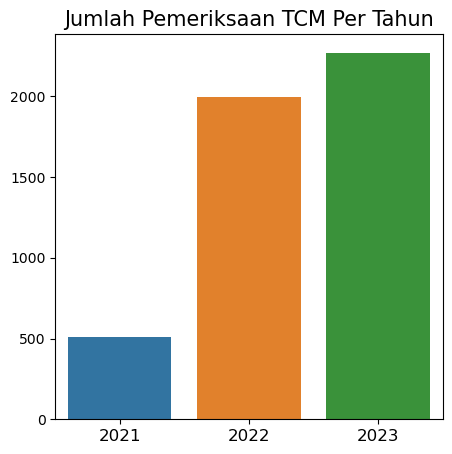

In [34]:
plt.figure(figsize=(5, 5))
 
sns.barplot(
    y="Jumlah", 
    x="Tahun",
    data=byyear_df.sort_values(by="Jumlah", ascending=False)
)
plt.title("Jumlah Pemeriksaan TCM Per Tahun", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Dari Hasil Grafik diatas, dapat dilihat setiap tahun mengalami peningkatan pemeriksaan

In [35]:
byfasyankes_df = df.groupby(by="Fasyankes Pengirim").No.nunique().reset_index()
byfasyankes_df.rename(columns={
    "No":"Jumlah"
}, inplace=True)


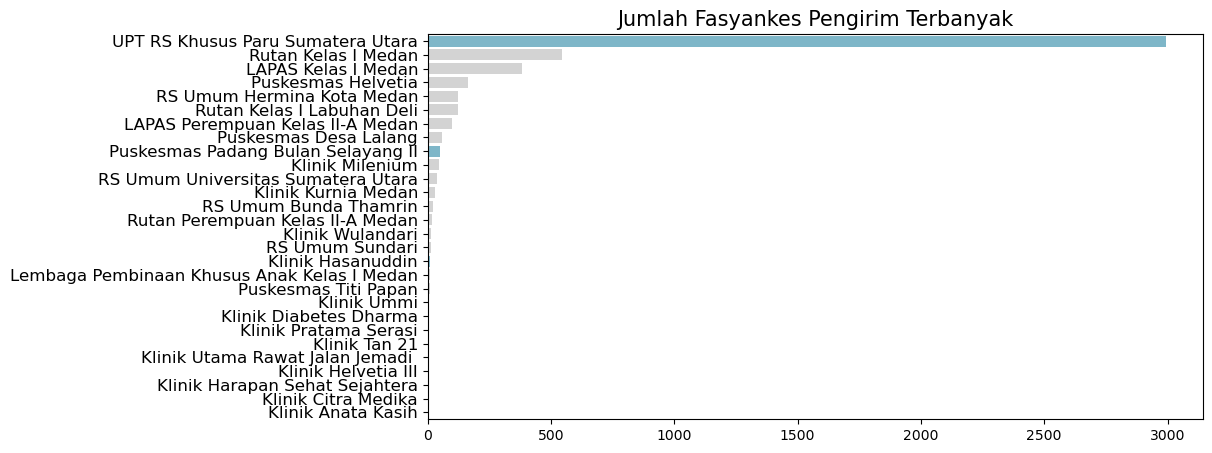

In [36]:
byfasyankes_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="Jumlah", 
    y="Fasyankes Pengirim",
    data=byfasyankes_df.sort_values(by="Jumlah", ascending=False),
    palette=colors_
)
plt.title("Jumlah Fasyankes Pengirim Terbanyak", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dari Grafik diatas dapat dilihat, fasyankes pengirim terbanyak selain UPT RSK Paru adalah Rutan Kelas I Medan

In [37]:
df["kelompok_usia"] = df.Umur.apply(lambda x: "Anak-anak" if x <= 17 else ("Lanjut Usia" if x > 60 else "Dewasa"))
df.groupby(by="kelompok_usia").No.nunique().sort_values(ascending=False)

kelompok_usia
Dewasa         3894
Lanjut Usia     740
Anak-anak       139
Name: No, dtype: int64

Jumlah Pemeriksaan Berdasatkan Kelompok Usia

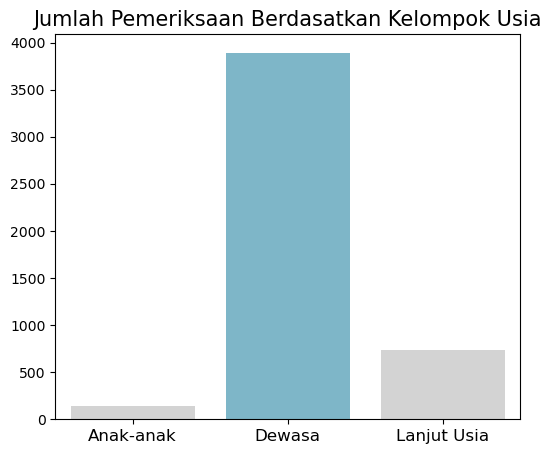

In [38]:
byage_df = df.groupby(by="kelompok_usia").No.nunique().reset_index()
byage_df.rename(columns={
    "No": "Jumlah"
}, inplace=True)
byage_df
byage_df['kelompok_usia'] = pd.Categorical(byage_df['kelompok_usia'], ["Anak-anak", "Dewasa", "Lanjut Usia"])
plt.figure(figsize=(6, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(
    y="Jumlah", 
    x="kelompok_usia",
    data=byage_df.sort_values(by="kelompok_usia", ascending=False),
    palette=colors_
)
plt.title("Jumlah Pemeriksaan Berdasatkan Kelompok Usia", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik diatas, paling banyak pemeriksaan dilakukan pada orang dewasa dengan kreiteria dibawah ini :
1. Anak-anak dibawah 17 tahun
2. Dewasa 17 s.d 60 tahun
3. Lanjut Usia diatas 60 tahun

In [39]:
df["range_waktu"] = df.duration_time.apply(lambda x: "0 hari" if x == 0 else ("Diatas 3 hari" if x > 3 else "Diatas 1 hari"))
df.groupby(by="range_waktu").No.nunique().sort_values(ascending=False)

range_waktu
Diatas 1 hari    2980
0 hari           1090
Diatas 3 hari     703
Name: No, dtype: int64

In [40]:
df.head()

,No,Umur,Alasan pemeriksaan,Kriteria Terduga,Tgl Permohonan Lab,Hasil Pemeriksaan TCM,Tgl Pengambilan Contoh Uji,Tgl Contoh Uji Dikirim,Tgl Contoh Uji diterima Lab,Tgl Hasil dilaporkan,TAT Hasil Pemeriksaan,Fasyankes Pengirim,duration_time,tanggal,Bulan,Tahun,kelompok_usia,range_waktu
0,1,27,Diagnosis TB SO,Terduga TBC SO,2023-05-23,Rif Sen,2023-05-23,2023-05-23,2023-05-25,2023-05-25,0,Klinik Anata Kasih,2.0,2023-05-23,5,2023,Dewasa,Diatas 1 hari
1,2,18,Diagnosis TB SO,Terduga TBC SO,2023-09-29,Neg,2023-09-29,2023-09-29,2023-10-02,2023-10-02,0,Klinik Citra Medika,3.0,2023-09-29,9,2023,Dewasa,Diatas 1 hari
2,3,84,Diagnosis TB SO,Terduga TBC SO,2023-09-14,Neg,2023-09-14,2023-09-14,2023-09-15,2023-09-15,0,Klinik Diabetes Dharma,1.0,2023-09-14,9,2023,Lanjut Usia,Diatas 1 hari
3,4,56,Diagnosis TB SO,Terduga TBC SO,2023-09-07,Neg,2023-09-07,2023-09-07,2023-09-13,2023-09-13,0,Klinik Diabetes Dharma,6.0,2023-09-07,9,2023,Dewasa,Diatas 3 hari
4,5,27,Diagnosis TB SO,Terduga TBC SO,2023-06-26,Neg,2023-07-06,2023-07-06,2023-06-29,2023-07-03,4,Klinik Diabetes Dharma,7.0,2023-06-26,6,2023,Dewasa,Diatas 3 hari


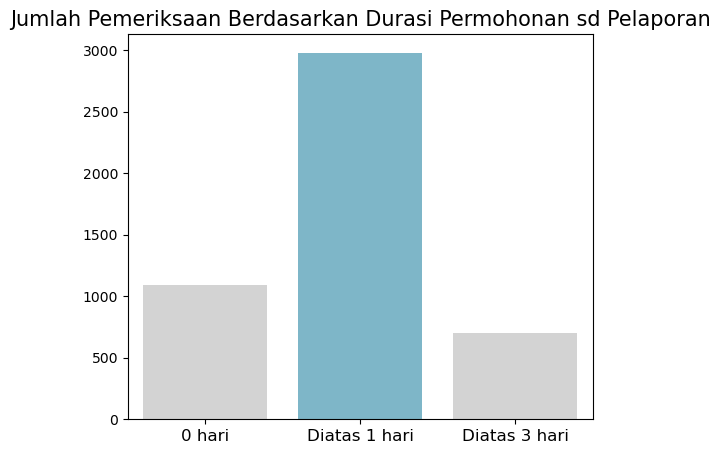

In [41]:
bytime_df = df.groupby(by="range_waktu").No.nunique().reset_index()
bytime_df.rename(columns={
    "No": "Jumlah"
}, inplace=True)
bytime_df
bytime_df['range_waktu'] = pd.Categorical(bytime_df['range_waktu'], ["0 hari", "Diatas 1 hari", "Diatas 3 hari"])
plt.figure(figsize=(6, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(
    y="Jumlah", 
    x="range_waktu",
    data=bytime_df.sort_values(by="range_waktu", ascending=False),
    palette=colors_
)
plt.title("Jumlah Pemeriksaan Berdasarkan Durasi Permohonan sd Pelaporan", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Dari Grafik diatas, paling banyak durasi waktu dari permohonan sd pelaporan ada diatas 1 sd 2 hari

In [42]:
df_2021 = df[df['Tahun']==2021]
df_2022 = df[df['Tahun']==2022]
df_2023 = df[df['Tahun']==2023]

In [43]:
df_2023['Fasyankes Pengirim'].value_counts()

UPT RS Khusus Paru Sumatera Utara              1020
LAPAS Kelas I Medan                             318
Rutan Kelas I Medan                             284
Rutan Kelas I Labuhan Deli                      122
RS Umum Hermina Kota Medan                      112
Puskesmas Helvetia                              109
Puskesmas Desa Lalang                            58
Puskesmas Padang Bulan Selayang II               50
RS Umum Universitas Sumatera Utara               39
Klinik Kurnia Medan                              31
Klinik Milenium                                  24
RS Umum Bunda Thamrin                            22
Rutan Perempuan Kelas II-A Medan                 18
RS Umum Sundari                                  14
Klinik Wulandari                                 13
Klinik Hasanuddin                                10
Klinik Ummi                                       6
LAPAS Perempuan Kelas II-A Medan                  5
Lembaga Pembinaan Khusus Anak Kelas I Medan       3
Klinik Tan 2

In [44]:
byfasyankes_2023_df = df_2023.groupby(by="Fasyankes Pengirim").No.nunique().reset_index()
byfasyankes_2023_df.rename(columns={
    "No":"Jumlah"
}, inplace=True)

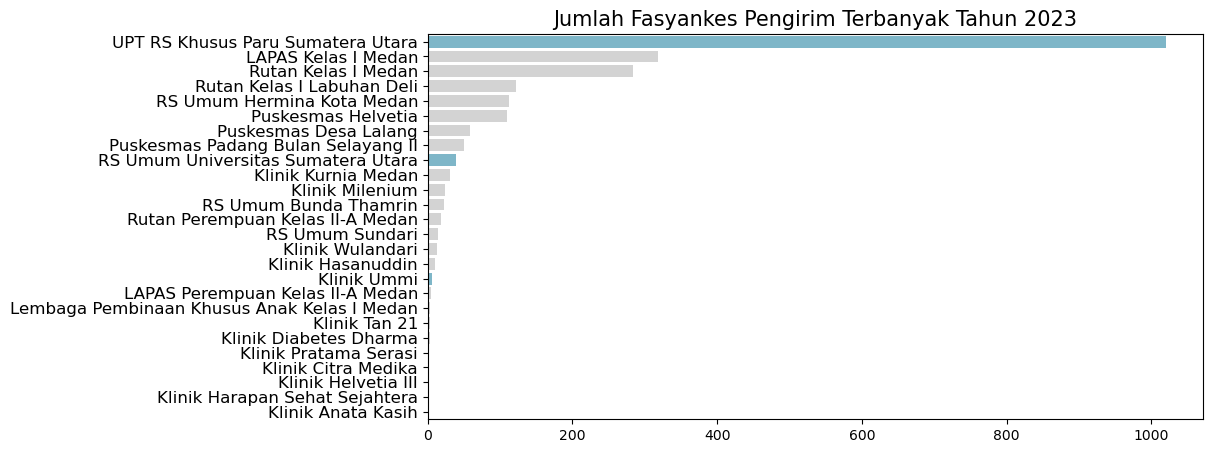

In [45]:
df_2023
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="Jumlah", 
    y="Fasyankes Pengirim",
    data=byfasyankes_2023_df.sort_values(by="Jumlah", ascending=False),
    palette=colors_
)
plt.title("Jumlah Fasyankes Pengirim Terbanyak Tahun 2023", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [46]:
bytime_2023_df = df_2023.groupby(by="range_waktu").No.nunique().reset_index()
bytime_2023_df.rename(columns={
    "No": "Jumlah"
}, inplace=True)

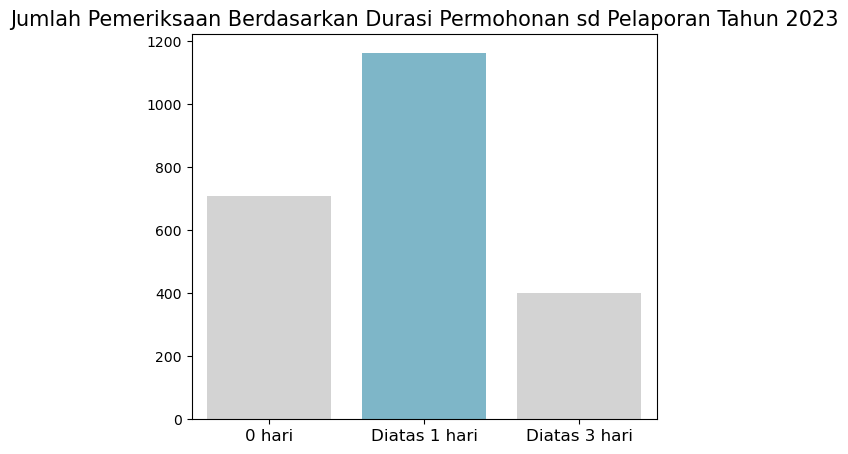

In [47]:
bytime_2023_df
bytime_2023_df['range_waktu'] = pd.Categorical(bytime_2023_df['range_waktu'], ["0 hari", "Diatas 1 hari", "Diatas 3 hari"])
plt.figure(figsize=(6, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(
    y="Jumlah", 
    x="range_waktu",
    data=bytime_2023_df.sort_values(by="range_waktu", ascending=False),
    palette=colors_
)
plt.title("Jumlah Pemeriksaan Berdasarkan Durasi Permohonan sd Pelaporan Tahun 2023", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [48]:
df_2023['Hasil Pemeriksaan TCM'].value_counts()

Neg          1632
Rif Sen       470
ERROR          70
Rif Res        49
Rif Indet      30
NO RESULT      13
INVALID         6
Name: Hasil Pemeriksaan TCM, dtype: int64

In [49]:
byhasil_2023_df = df_2023.groupby(by="Hasil Pemeriksaan TCM").No.nunique().reset_index()
byhasil_2023_df.rename(columns={
    "No": "Jumlah"
}, inplace=True)

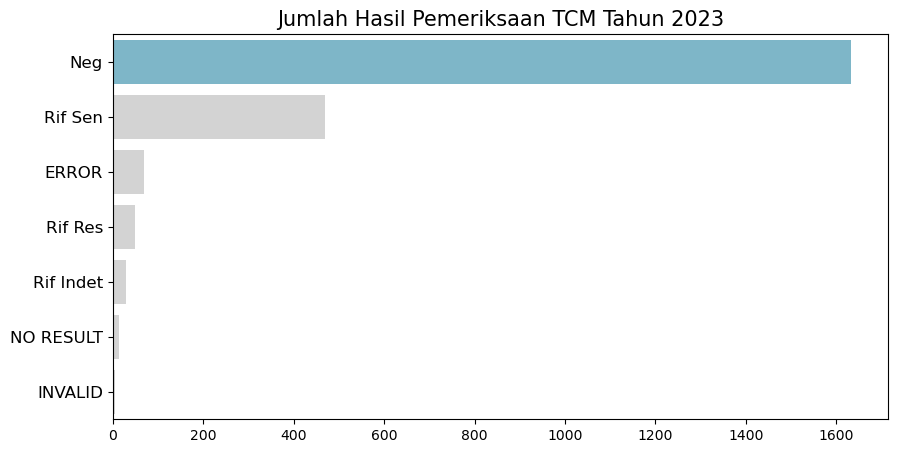

In [50]:
byhasil_2023_df

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="Jumlah", 
    y="Hasil Pemeriksaan TCM",
    data=byhasil_2023_df.sort_values(by="Jumlah", ascending=False),
    palette=colors_
)
plt.title("Jumlah Hasil Pemeriksaan TCM Tahun 2023", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dari Hasil diatas, dapat dilihat hasil pemeriksaan TCM pada tahun 2023 yaitu Negatif

In [51]:
df.to_csv("all_data.csv")